In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import webtfkerasToEstimator as web

/Users/shreyadutta/conda/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [23]:
train_data, train_label, validation_data, validation_label, test_data, test_label = web.data_preparation_moe()
predicted_indexes_moe=web.main1()


Training data shape = (50000, 1)
Validation data shape = (50000, 1)
Test data shape = (50000, 1)
input_shape=(?, 1)
shapeeeeeeeee=[1, 16, 8]
input_index=0, (x=Tensor("input_2:0", shape=(?, 1), dtype=float32), spec=InputSpec(min_ndim=2, axes={-1: Dimension(1)})),layer=mmoe_layers
input shape=(?, 1)
self.expert_kernels=(1, 16, 8)
input_index=0, (x=Tensor("mmoe_layers_1/Sum:0", shape=(?, 16), dtype=float32), spec=InputSpec(min_ndim=2)),layer=tower_layer
input_index=0, (x=Tensor("mmoe_layers_1/Sum:0", shape=(?, 16), dtype=float32), spec=InputSpec(min_ndim=2, axes={-1: 16})),layer=tower_layer
input_index=0, (x=Tensor("tower_layer_1/Relu:0", shape=(?, 8), dtype=float32), spec=InputSpec(min_ndim=2)),layer=y0
input_index=0, (x=Tensor("tower_layer_1/Relu:0", shape=(?, 8), dtype=float32), spec=InputSpec(min_ndim=2, axes={-1: 8})),layer=y0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)       

In [24]:
predicted_indexes_moe_array=[p['y0'] for p in predicted_indexes_moe]

INFO:tensorflow:Calling model_fn.
input_shape=(?, 1)
shapeeeeeeeee=[1, 16, 8]
input_index=0, (x=Tensor("input_2_1/input_2/Identity:0", shape=(?, 1), dtype=float32), spec=InputSpec(min_ndim=2, axes={-1: Dimension(1)})),layer=mmoe_layers
input shape=(?, 1)
self.expert_kernels=(1, 16, 8)
input_index=0, (x=Tensor("mmoe_layers/Sum:0", shape=(?, 16), dtype=float32), spec=InputSpec(min_ndim=2)),layer=tower_layer
input_index=0, (x=Tensor("mmoe_layers/Sum:0", shape=(?, 16), dtype=float32), spec=InputSpec(min_ndim=2, axes={-1: 16})),layer=tower_layer
input_index=0, (x=Tensor("tower_layer/Relu:0", shape=(?, 8), dtype=float32), spec=InputSpec(min_ndim=2)),layer=y0
input_index=0, (x=Tensor("tower_layer/Relu:0", shape=(?, 8), dtype=float32), spec=InputSpec(min_ndim=2, axes={-1: 8})),layer=y0
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/webtfkerasToEstimator/model.ckpt-4
INFO:tensorflow:Running local_init_op.
INFO:tensorflo

In [25]:
import numpy as np
predicted_indexes_moe_list=np.array([p.tolist()[0] for p in predicted_indexes_moe_array])

In [26]:
test_label=np.array([t[0] for t in test_label])

In [27]:
test_label

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [28]:
predicted_indexes_moe = predicted_indexes_moe_list
#predicted_indexes_moe=predicted_indexes_moe.squeeze()
import pandas as pd
predicted_indexes_moe_df = pd.DataFrame({'predicted_index':predicted_indexes_moe,'actual_index':test_label})


In [29]:
error_in_index_moe=predicted_indexes_moe-test_label

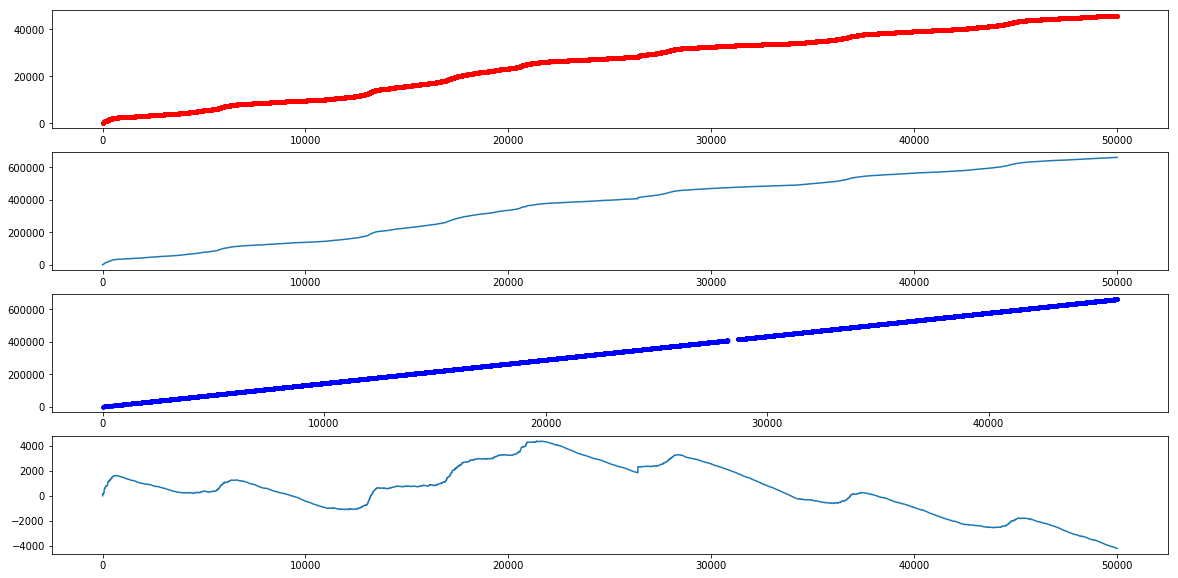

In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(411)
ax.plot(predicted_indexes_moe_df.actual_index, predicted_indexes_moe_df.predicted_index,'r.');

ax = fig.add_subplot(412)
ax.plot([t[0] for t in train_label] , train_data)

ax = fig.add_subplot(413)
ax.plot(predicted_indexes_moe_df.predicted_index , train_data, 'b.')

ax = fig.add_subplot(414)
ax.plot([t[0] for t in train_label], error_in_index_moe)